In [489]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [490]:

df=pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [491]:
df.shape

(891, 12)

In [492]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [493]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [494]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age,Cabin and Embarked columns have missing values
The number of missing values in Cabin are too many hence will be dropped
Some columns have inappropriate datatypes 

In [495]:
#Dropping the Cabin column
df.drop(columns='Cabin',inplace=True)
df['Age']



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

<Axes: xlabel='Pclass', ylabel='Age'>

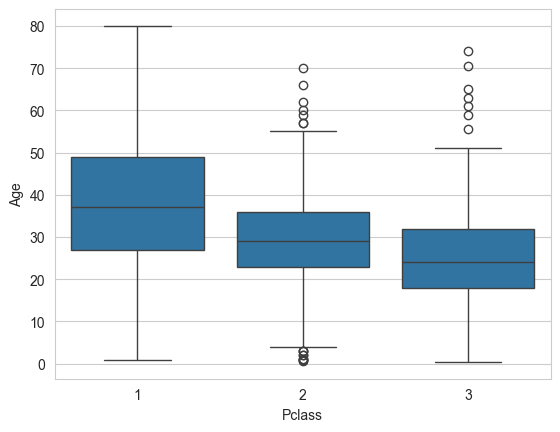

In [496]:
#Fixing the missing values in Age
#First check the relation betweeen Age and Pclass
sns.boxplot(x='Pclass',y='Age',data=df)


From this we can see that majority of the people in Pclass 1 are older and majority of the people in Pclass 3 are younger people

In [497]:
#We use a function to impute the age accordin to the age
def impute_age(df):
    if pd.isnull(df['Age']):
        if df['Pclass']==1:
            return 37
        elif df['Pclass']==2:
            return 29
        else:
            return 24
    return df['Age']
df['Age']=df.apply(impute_age,axis=1)
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [498]:
#imputing missing values for Embarked
#Finding the most appearing value for Embarked
df['Embarked'].value_counts()
#Most appearing is 'S' so we will use it to impute
df.fillna({'Embarked':'S'},inplace=True)

In [499]:
#Correcting the datatypes of some columns
df['Survived']=df['Survived'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')


In [500]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


<Axes: xlabel='Survived', ylabel='count'>

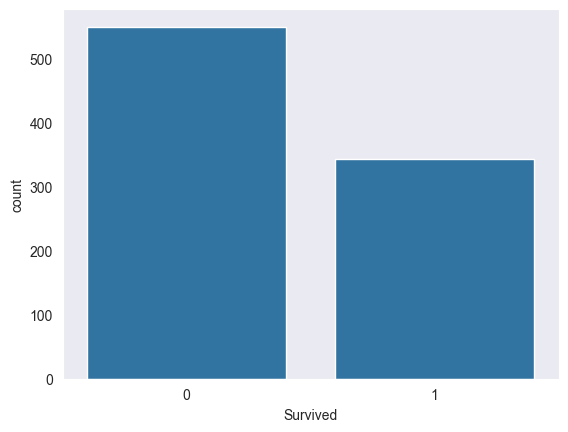

In [501]:
#Univariate analysis
sns.set_style('dark')
sns.countplot(x=df['Survived'])

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

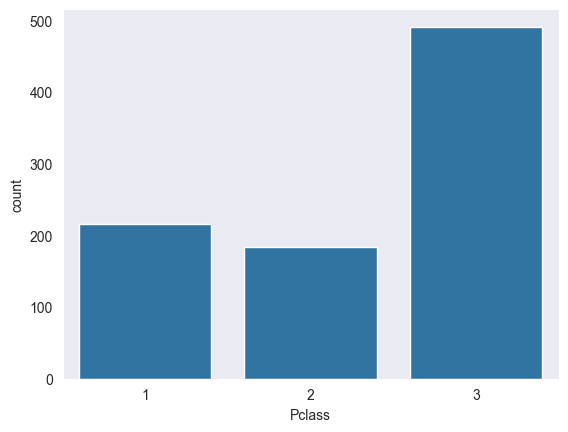

In [502]:
sns.set_style('dark')
sns.countplot(x=df['Pclass'])
df['Pclass'].value_counts()

<Axes: xlabel='Survived', ylabel='count'>

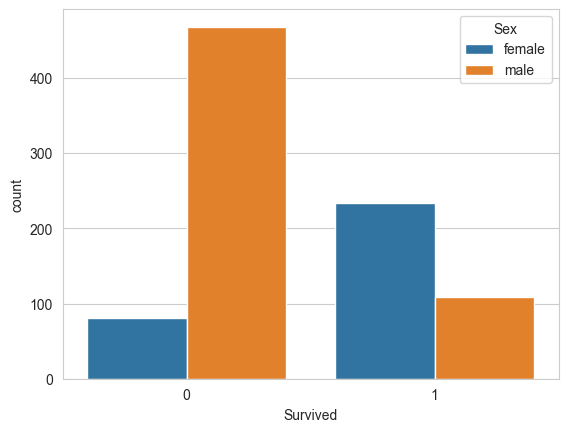

In [503]:
#Survival rates according to gender
sns.set_style('whitegrid')
sns.countplot(x=df['Survived'],hue=df['Sex'])

Many males succumbed while majority of the females survived

<Axes: xlabel='Survived', ylabel='count'>

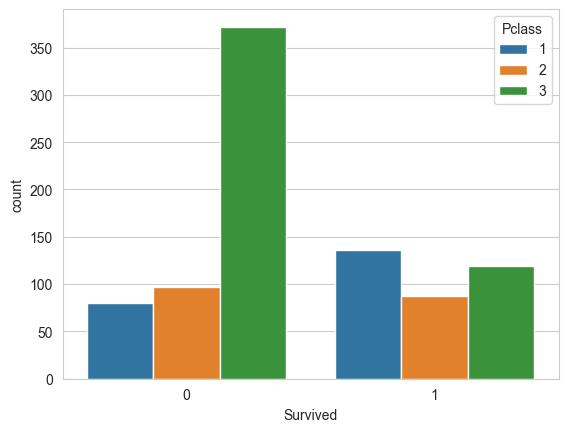

In [504]:
#Survival rates according to Passenger class
sns.set_style('whitegrid')
sns.countplot(x=df['Survived'],hue=df['Pclass'])

Pclass 3 has the highest death rates while Pclass 1 has the lowest death rates 

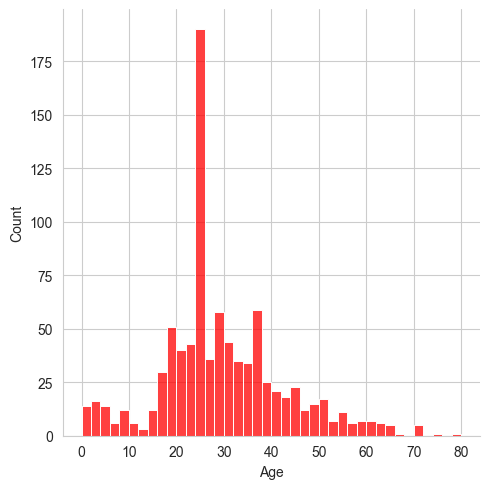

In [505]:
sns.displot(df['Age'],color='red',bins=40)


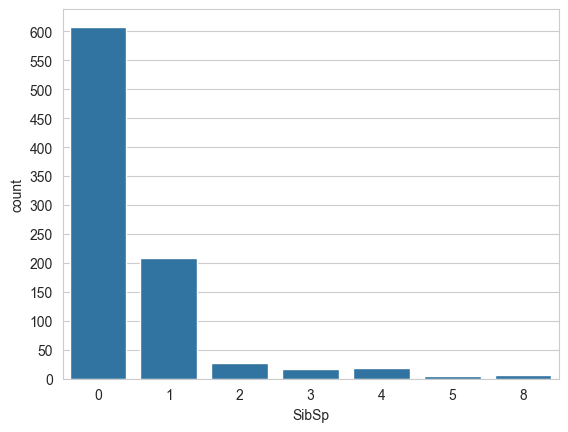

In [506]:
sns.countplot(x=df['SibSp'])
plt.yticks(range(0,601,50))
plt.show()

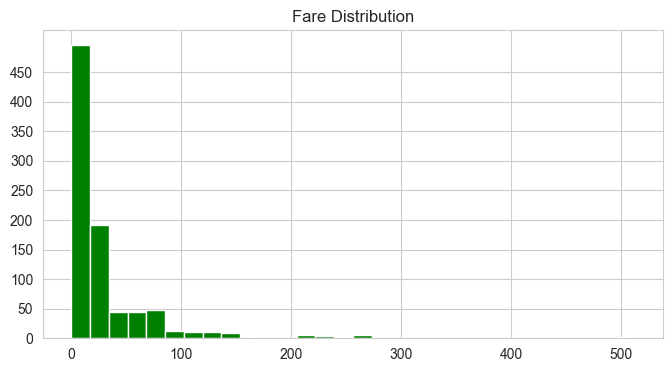

In [507]:
df['Fare'].hist(color='green',bins=30,figsize=(8,4))
plt.title('Fare Distribution')
plt.yticks(range(0,500,50))
plt.show()

In [508]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          891 non-null    int64   
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 52.8+ KB


Categorical variables
We convert our categorical features to dummy varaibles using pandas before feeding it to our machine learning algorithms

In [509]:

Embark=pd.get_dummies(df['Embarked'],drop_first=True)

In [510]:
sex=pd.get_dummies(df['Sex'],drop_first=True)


In [511]:
#To save on storage space let us drop all unrequired columns
df.drop(['Name','Ticket','Embarked','Sex','Fare','PassengerId'],axis=1,inplace=True)
df.head()

,Survived,Pclass,Age,SibSp,Parch
0,0,3,22,1,0
1,1,1,38,1,0
2,1,3,26,0,0
3,1,1,35,1,0
4,0,3,35,0,0


In [512]:
df=pd.concat([df,sex,Embark],axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22,1,0,True,False,True
1,1,1,38,1,0,False,False,False
2,1,3,26,0,0,False,False,True
3,1,1,35,1,0,False,False,True
4,0,3,35,0,0,True,False,True


In [513]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Age       891 non-null    int64   
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   male      891 non-null    bool    
 6   Q         891 non-null    bool    
 7   S         891 non-null    bool    
dtypes: bool(3), category(2), int64(3)
memory usage: 25.6 KB


Our data is ready for the model

In [514]:
#Splitting our dataset 
from sklearn.model_selection import train_test_split

In [515]:
X_train,X_test,Y_train,Y_test=train_test_split(df.drop(['Survived'],axis=1),df['Survived'],test_size=0.2,random_state=0)

__Training and Predicting__

In [516]:
from sklearn.linear_model import LogisticRegression

In [517]:
logmodel=LogisticRegression()
logmodel.fit(X_train,Y_train)

LogisticRegression()

In [518]:
predictions=logmodel.predict(X_test)

In [519]:
from sklearn.metrics import confusion_matrix

In [520]:
accuracy=confusion_matrix(Y_test,predictions)
accuracy

array([[95, 15],
       [18, 51]])

In [521]:
from sklearn.metrics import accuracy_score

In [522]:
accuracy=accuracy_score(Y_test,predictions)
accuracy

0.8156424581005587

In [523]:
predictions

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0])